In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

from ml_models.load_data import *
from sklearn.ensemble import RandomForestRegressor


In [2]:
dataset_dir = "/Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Dataset/"

participants = ['P01','P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 
                'P10', 'P11', 'P12', 'P13', 'P14', 'P15']

folds = generate_random_folds(participants=participants, n_test=1, n_folds=5, seed=42)


## Lasso Regression

In [5]:
# Lists to store metrics for each fold for each model
lasso_metrics = []
rf_metrics = []

# Loop over each fold for cross-validation
for fold_index in range(len(folds)):
    print(f"Processing Fold {fold_index}")
    
    # Construct the paths for the training and test sets for the current fold
    data_set = {
        'Train_set': [os.path.join(dataset_dir, P) for P in folds[fold_index][0]],
        'Test_set': [os.path.join(dataset_dir, P) for P in folds[fold_index][1]]
    }
    
    # Load datasets using your custom function
    X_train, y_train  = load_dataset(data_set['Train_set'])
    X_test, y_test = load_dataset(data_set["Test_set"])
    
    # Standardize features: fit on training and transform both training and test sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
    
    # --- Model 1: Lasso Regression ---
    lasso_model = Lasso(alpha=1.0, max_iter=10000)
    lasso_model.fit(X_tr, y_tr)
    y_pred_lasso = lasso_model.predict(X_val)
    
    mse_lasso = mean_squared_error(y_val, y_pred_lasso)
    r2_lasso = r2_score(y_val, y_pred_lasso)
    # Compute relative error: (Predicted - True) / True
    relative_error_lasso = (y_pred_lasso - y_val) / y_val
    
    y_pred_lasso_test = lasso_model.predict(X_test)
    mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
    r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
    relative_error_lasso_test = (y_pred_lasso_test - y_test) / y_test

    
    lasso_metrics.append({
        'mse_val': mse_lasso,
        'r2_val': r2_lasso,
        'relative_error_val': relative_error_lasso,
        'mse_test': mse_lasso_test,
        'r2_test': r2_lasso_test,
        'relative_error_test': relative_error_lasso_test,
    })
    
    
    print(f"Fold {fold_index} Lasso [Validation set] - MSE: {mse_lasso:.4f}, R2: {r2_lasso:.4f}")

    print(f"Fold {fold_index} Lasso [Test set] - MSE: {mse_lasso_test:.4f}, R2: {r2_lasso_test:.4f}")


Processing Fold 0
Fold 0 Lasso [Validation set] - MSE: 404.7006, R2: 0.0959
Fold 0 Lasso [Test set] - MSE: 465.4731, R2: -0.0031
Processing Fold 1
Fold 1 Lasso [Validation set] - MSE: 398.8710, R2: 0.0896
Fold 1 Lasso [Test set] - MSE: 436.3988, R2: 0.0005
Processing Fold 2
Fold 2 Lasso [Validation set] - MSE: 406.2127, R2: 0.0873
Fold 2 Lasso [Test set] - MSE: 370.9977, R2: -0.0021
Processing Fold 3
Fold 3 Lasso [Validation set] - MSE: 412.1803, R2: 0.0801
Fold 3 Lasso [Test set] - MSE: 483.0044, R2: -0.0011
Processing Fold 4
Fold 4 Lasso [Validation set] - MSE: 406.6101, R2: 0.0913
Fold 4 Lasso [Test set] - MSE: 461.1457, R2: -0.0080


In [6]:
# Lists to store metrics for each fold for each model
rf_metrics = []

# Loop over each fold for cross-validation
for fold_index in range(len(folds)):
    print(f"Processing Fold {fold_index}")
    
    # Construct the paths for the training and test sets for the current fold
    data_set = {
        'Train_set': [os.path.join(dataset_dir, P) for P in folds[fold_index][0]],
        'Test_set': [os.path.join(dataset_dir, P) for P in folds[fold_index][1]]
    }
    
    # Load datasets using your custom function
    X_train, y_train  = load_dataset(data_set['Train_set'])
    X_test, y_test = load_dataset(data_set["Test_set"])
    
    # Standardize features: fit on training and transform both training and test sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
    
    # --- Model 2: Random Forest Regression ---
    rf_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=42)
    rf_model.fit(X_tr, y_tr)
    y_pred_rf = rf_model.predict(X_val)
    
    mse_rf = mean_squared_error(y_val, y_pred_rf)
    r2_rf = r2_score(y_val, y_pred_rf)
    # Compute relative error: (Predicted - True) / True
    relative_error_rf = (y_pred_rf - y_val) / y_val
    
    y_pred_rf_test = rf_model.predict(X_test_scaled)
    mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
    r2_rf_test = r2_score(y_test, y_pred_rf_test)
    relative_error_rf_test = (y_pred_rf_test - y_test) / y_test

    rf_metrics.append({
        'mse_val': mse_rf,
        'r2_val': r2_rf,
        'relative_error_val': relative_error_rf,
        'mse_test': mse_rf_test,
        'r2_test': r2_rf_test,
        'relative_error_test': relative_error_rf_test,
    })
    
    print(f"Fold {fold_index} RF [Validation set] - MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")
    print(f"Fold {fold_index} RF [Test set] - MSE: {mse_rf_test:.4f}, R2: {r2_rf_test:.4f}")


Processing Fold 0
Fold 0 RF [Validation set] - MSE: 3.0085, R2: 0.9933
Fold 0 RF [Test set] - MSE: 512.4081, R2: -0.1043
Processing Fold 1
Fold 1 RF [Validation set] - MSE: 2.9928, R2: 0.9932
Fold 1 RF [Test set] - MSE: 568.3832, R2: -0.3018
Processing Fold 2
Fold 2 RF [Validation set] - MSE: 2.7439, R2: 0.9938
Fold 2 RF [Test set] - MSE: 323.6948, R2: 0.1257
Processing Fold 3
Fold 3 RF [Validation set] - MSE: 3.0197, R2: 0.9933
Fold 3 RF [Test set] - MSE: 450.3300, R2: 0.0667
Processing Fold 4
Fold 4 RF [Validation set] - MSE: 2.8762, R2: 0.9936
Fold 4 RF [Test set] - MSE: 451.3263, R2: 0.0135


In [14]:
import pickle
with open("rf_metrics.pkl", "wb") as f:
    pickle.dump(rf_metrics, f)

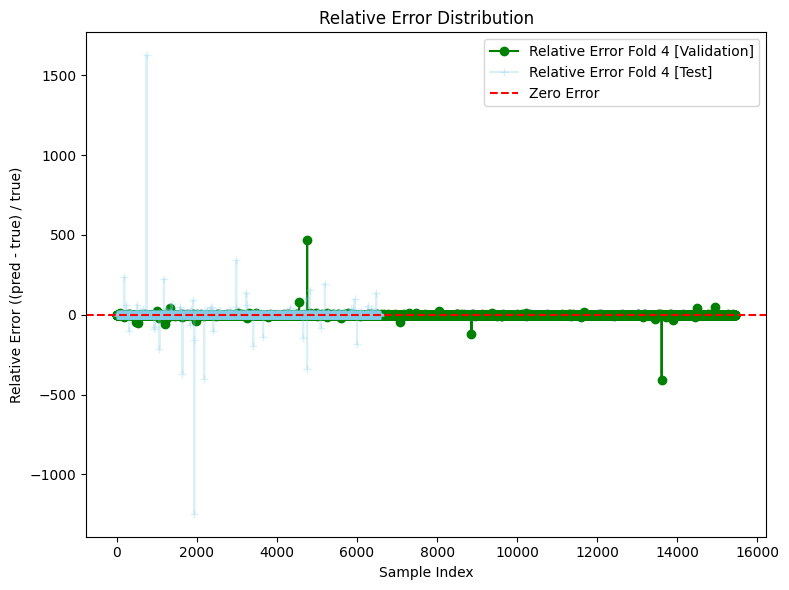

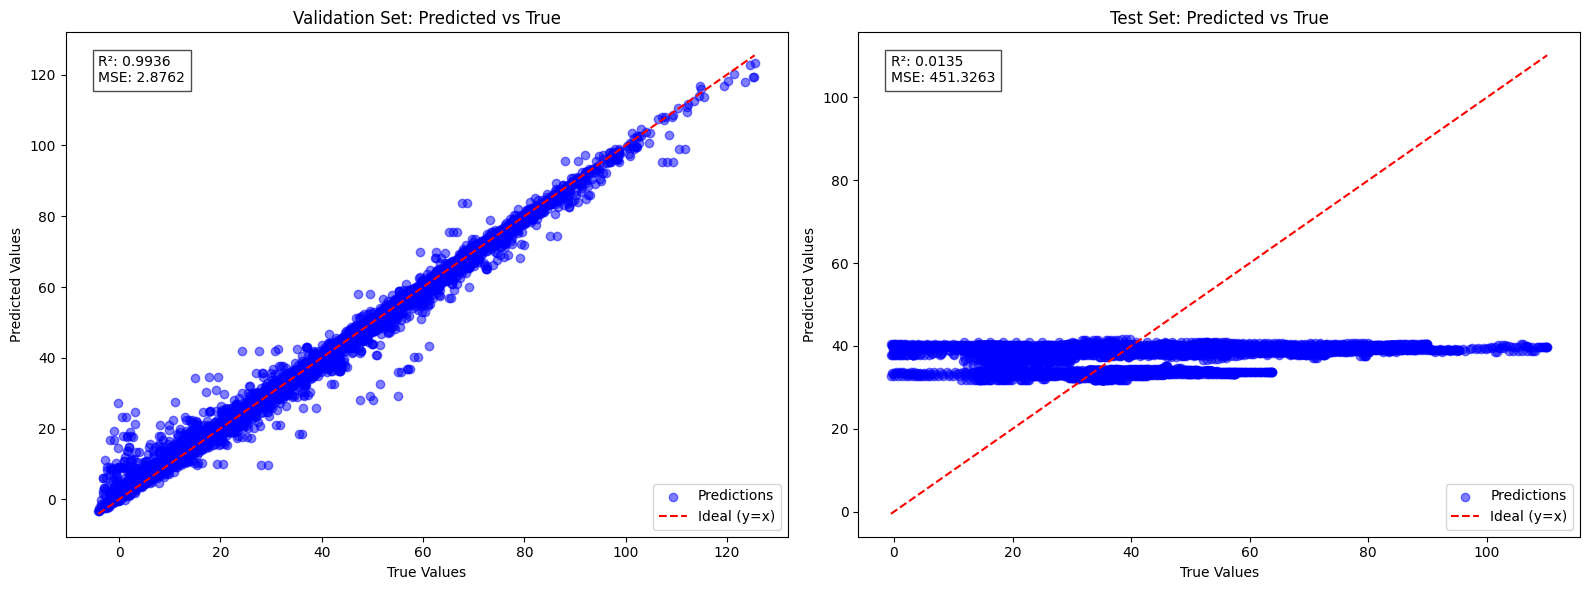

In [24]:
# ---------------------------
# Relative Error Histogram
# ---------------------------


plt.figure(figsize=(8, 6))
plt.plot(rf_metrics[-1]["relative_error_val"], label="Relative Error Fold 4 [Validation]", marker='o', color='green',linestyle="solid")
plt.plot(rf_metrics[-1]["relative_error_test"], label="Relative Error Fold 4 [Test]", marker='+', color='skyblue',linestyle="solid", alpha=0.3)

plt.axhline(0, color='red', linestyle='dashed', label="Zero Error")

plt.xlabel("Sample Index")
plt.ylabel("Relative Error ((pred - true) / true)")
plt.title("Relative Error Distribution")
plt.tight_layout()
plt.legend()
plt.savefig("rf_validation_relative_error_histogram.pdf", format="pdf", dpi=300)
plt.show()

# ---------------------------
# Scatter Plot: Predicted vs True (Validation and Test)
# ---------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Validation Set Scatter Plot ---
ax1.scatter(y_val, y_pred_rf, alpha=0.5, color="blue" ,label="Predictions")
# Plot the ideal prediction line (y = x)
min_val, max_val = min(y_val), max(y_val)
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal (y=x)")
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Validation Set: Predicted vs True")
# Annotate with R² and MSE
ax1.text(min_val, max_val, f"R²: {r2_rf:.4f}\nMSE: {mse_rf:.4f}",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
ax1.legend()

# --- Test Set Scatter Plot ---
ax2.scatter(y_test, y_pred_rf_test, alpha=0.5, color="blue", label="Predictions")
min_test, max_test = min(y_test), max(y_test)
ax2.plot([min_test, max_test], [min_test, max_test], 'r--', label="Ideal (y=x)")
ax2.set_xlabel("True Values")
ax2.set_ylabel("Predicted Values")
ax2.set_title("Test Set: Predicted vs True")
ax2.text(min_test, max_test, f"R²: {r2_rf_test:.4f}\nMSE: {mse_rf_test:.4f}",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
ax2.legend()

plt.tight_layout()
plt.savefig("rf_scatter_pred_vs_true_validation_test.pdf", format="pdf", dpi=300)
plt.show()